In [1]:
import numpy as np 
import pandas as pd 
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.offline as pyo
pyo.init_notebook_mode()

import re
import nltk
import string
from nltk.corpus import stopwords

In [2]:
tweets = pd.read_csv(r"C:\Users\new\Dropbox\My PC (LAPTOP-VOB8LHM1)\Downloads\vaccination_tweets\vaccination_tweets.csv")



In [3]:
tweets.head(10)

id             user_name                user_location  \
0  1340539111971516416            Rachel Roh    La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong            San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                     Your Bed   
3  1337855739918835717         Charles Adler       Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                          NaN   
5  1337852648389832708                   Dee          Birmingham, England   
6  1337851215875608579     Gunther Fehlinger  Austria, Ukraine and Kosovo   
7  1337850832256176136   Dr.Krutika Kuppalli                          NaN   
8  1337850023531347969           Erin Despas                          NaN   
9  1337842295857623042          Ch.Amjad Ali                    Islamabad   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
5  Gastroenterology trainee, Clinical Research Fe...  2020-01-26 21:43:12   
6  End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
7  ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
8  Designing&selling on Teespring. Like 90s Disne...  2009-10-30 17:53:54   
9  #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   
5             105           108              106          False   
6            2731          5001            69344          False   
7           21924           593             7815           True   
8             887          1515             9639          False   
9             671          2368            20469          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
5  2020-12-12 20:11:42  Does anyone have any useful advice/guidance fo...   
6  2020-12-12 20:06:00  it is a bit sad to claim the fame for success ...   
7  2020-12-12 20:04:29  There have not been many bright days in 2020 b...   
8  2020-12-12 20:01:16  Covid vaccine; You getting it?\n\n #CovidVacci...   
9  2020-12-12 19:30:33  #CovidVaccine \n\nStates will start getting #C...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   
5                                                NaN   Twitter for iPhone   
6                                    ['vaccination']      Twitter Web App   
7                    ['BidenHarris', 'Election2020']   Twitter for iPhone   
8  ['CovidVaccine', 'covid19', 'PfizerBioNTec

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8631 non-null   int64 
 1   user_name         8631 non-null   object
 2   user_location     6895 non-null   object
 3   user_description  8094 non-null   object
 4   user_created      8631 non-null   object
 5   user_followers    8631 non-null   int64 
 6   user_friends      8631 non-null   int64 
 7   user_favourites   8631 non-null   int64 
 8   user_verified     8631 non-null   bool  
 9   date              8631 non-null   object
 10  text              8631 non-null   object
 11  hashtags          6580 non-null   object
 12  source            8630 non-null   object
 13  retweets          8631 non-null   int64 
 14  favorites         8631 non-null   int64 
 15  is_retweet        8631 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 961.0+ KB


In [5]:
tweets.shape
# it gives how many rows and columns present in the dataset.

(8631, 16)

# What the above data explains to us?
id is the unique identity for each person.
user_name is the Persons user name in twitter.
user_location is the location of each person.
user_description is the perons Bio in twitter.
user_created is the date of the account created by the user in twitter.
user_followers is the Persons Total number of followers.
user_friends is the Persons Total number of friends.
user_favourites tells us that the Total Number of Favourite posts liked by that person.
user_verified is the boolean of whether he has a verified twitter account.
date is the date at which he tweeted.
text is the statement that he tweeted.
hashtags is the List of words that he highlighted using #
source is the which source he used for posting his tweet.
retweets gives us the count of replys to his tweet.
favorites gives us the how many people liked his post.
is_retweet gives us whether he Re-posted his/others tweet.

In [6]:
px.histogram(tweets, x="date",nbins=100,opacity=.5,title="Tweets by date")

In [7]:
tweets["user_location"] = tweets["user_location"].fillna("no_location")
def make_location(location):
    return location.split(",")[0]

tweets["user_location"] = tweets["user_location"].apply(make_location)
city = tweets["user_location"].value_counts()
city.drop("no_location",inplace=True)
city = pd.DataFrame(city)
city.reset_index(inplace=True)

city.columns=["city","counts"]

fig = px.bar(city.head(10), x="city", y="counts",color="city",text="counts",title="City")
fig.update_traces(textposition='outside')
fig.show()

In [8]:
text_list = tweets["text"].to_list()
text = ""
for i in text_list:
    text = text + i.split("https:")[0]
    
text = text.replace(" ",",")
text = re.sub("[\@\#\n\.\…\?\\\'\d\)\(\%\*]", ",", text)
text = re.sub(",{2,}", ",", text)
text[:1000]

'Same,folks,said,daikon,paste,could,treat,a,cytokine,storm,PfizerBioNTech,While,the,world,has,been,on,the,wrong,side,of,history,this,year,hopefully,the,biggest,vaccination,effort,we,ve,ev,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,Facts,are,immutable,Senator,even,when,you,re,not,ethically,sturdy,enough,to,acknowledge,them,You,were,born,i,Explain,to,me,again,why,we,need,a,vaccine,BorisJohnson,MattHancock,whereareallthesickpeople,PfizerBioNTech,Does,anyone,have,any,useful,advice/guidance,for,whether,the,COVID,vaccine,is,safe,whilst,breastfeeding,it,is,a,bit,sad,to,claim,the,fame,for,success,of,vaccination,on,patriotic,competition,between,USA,Canada,UK,and,There,have,not,been,many,bright,days,in,but,here,are,some,of,the,best,BidenHarris,winning,Election,Covid,vaccine;,You,getting,it,CovidVaccine,covid,PfizerBioNTech,Moderna,CovidVaccine,States,will,start,getting,COVID,Vaccine,Monday,US,says,pakustv,NYC,Healthcare,GlobalGoals,w

In [9]:
len(text)

850603

In [10]:
text = text.split(',')
text[:10]

['Same',
 'folks',
 'said',
 'daikon',
 'paste',
 'could',
 'treat',
 'a',
 'cytokine',
 'storm']

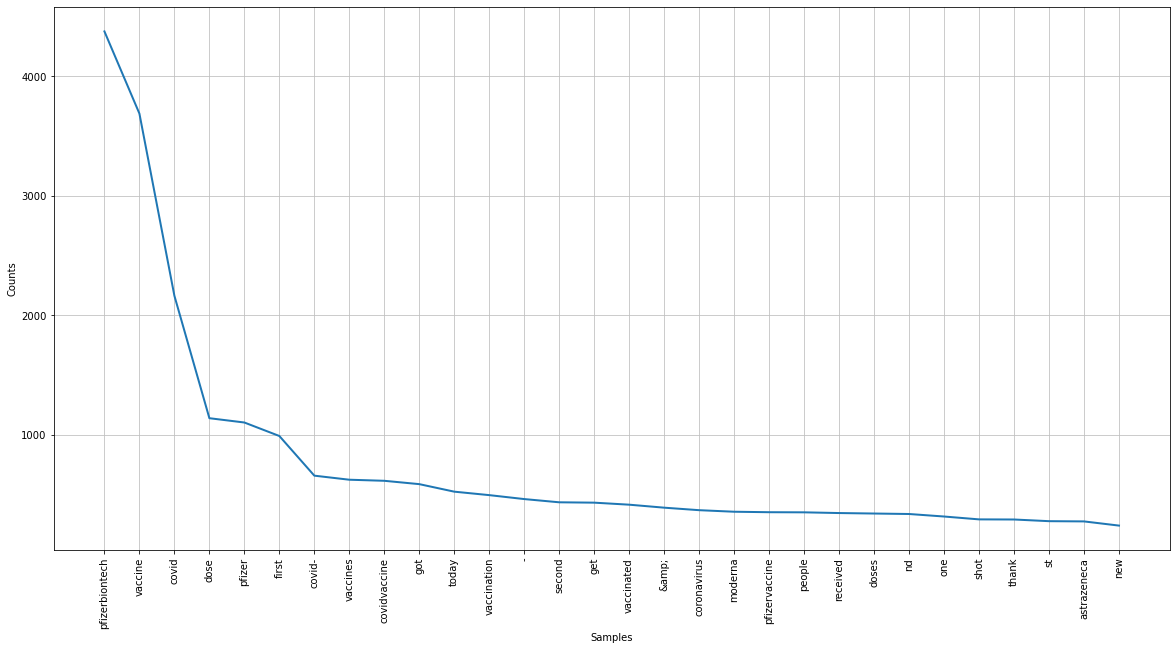

In [11]:
def stop_w(x):
    new_s = []
    for i in text:
        if i.lower() not in stopwords.words("english"):
            new_s.append(i.lower())
    return new_s

text = stop_w(text)

plt.figure(figsize=(20,10))
FreqDist(text).plot(30)

# Word Cloud before Data Cleaning

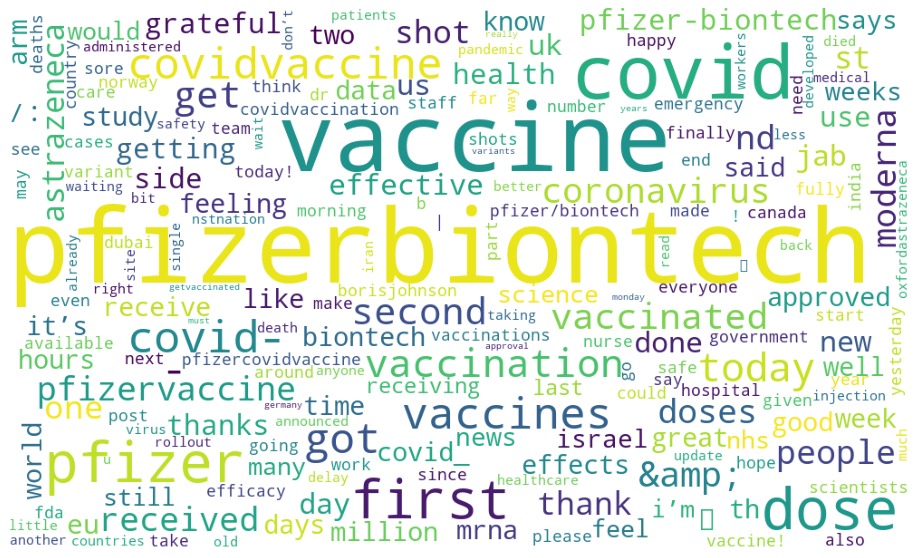

In [12]:
text_count = pd.Series(text).value_counts()
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.figure(figsize=(20,10),facecolor='w')
plt.imshow(wc.generate_from_frequencies(text_count))
plt.axis("off")
plt.show()

In [13]:
print("{} unique Id's are present in the dataset.".format(len(tweets['id'].value_counts())))

8631 unique Id's are present in the dataset.


In [14]:
# drops the "is_retweet" and "id" columns.
tweets.drop(['is_retweet', 'id'], axis=1, inplace=True)

In [15]:
# code for showing a column having atleat one Null value.
for col in tweets.columns:
    if tweets[col].isna().sum() > 0:
        print("{} Null values present in the {} column.".format(tweets[col].isna().sum(), col))

537 Null values present in the user_description column.
2051 Null values present in the hashtags column.
1 Null values present in the source column.


In [16]:
tweets.source.value_counts()

Twitter for iPhone                 3021
Twitter Web App                    2447
Twitter for Android                2046
TweetDeck                           494
Twitter for iPad                    242
Instagram                           110
Buffer                               55
Hootsuite Inc.                       53
IFTTT                                18
Blog2Social APP                      16
Nonli                                10
LinkedIn                              9
Tweetbot for iΟS                      8
Microsoft Power Platform              8
SocialFlow                            7
ETRetail.com                          6
24liveblog                            6
Sendible                              6
WordPress.com                         5
Twitter for Mac                       5
Twitter Media Studio                  4
Paper.li                              4
Nelio Content                         4
dlvr.it                               4
Flying Eze                            3


In [17]:
# As there's only 1 missing value in this column, let's fill it with the highest class value = "Twitter for iPhone".

tweets.source.fillna('Twitter for iPhone', inplace=True)

In [18]:
# fill other nan values with "Not Available" class.
tweets.fillna("Not Available",inplace=True)
tweets.isna().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
dtype: int64

# Text Cleaning

In [19]:
# replace the username with alphabets only.

tweets['user_name'] = tweets['user_name'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))

In [20]:
# Changed to Date TIme series.

tweets.user_created = tweets.user_created.astype('datetime64[ns]')
tweets.date = tweets.date.astype('datetime64[ns]')

In [21]:
tweets.date[0].day_name() # this line make sures that they are date time series.

'Sunday'

In [22]:
# function to convert text to lowercase, remove punctuations & special Characters for generating a word cloud.

def clean_description(desc):
    if(desc == "Not Available"):
        pass
    else:
        desc=str(desc).lower()
    
        desc = re.sub('[^a-zA-Z]', ' ', desc)
    
        desc=re.sub("(\\d|\\W)+"," ",desc)
    
    return desc

In [23]:
# I have cleaned the user_description column in order to search for specific terms.
tweets['clean_desc'] = tweets.user_description.apply(clean_description)

# Cleaned text
tweets['clean_text'] = tweets.text.apply(clean_description)

In [24]:
#droping 'user_description', 'text' columns
tweets.drop(columns= ['user_description', 'text'], inplace=True)

In [25]:
tweets.head()

user_name          user_location        user_created  \
0           RachelRoh  La Crescenta-Montrose 2009-04-08 17:52:46   
1          AlbertFong          San Francisco 2009-09-21 15:27:30   
2                 eli               Your Bed 2020-06-25 23:30:28   
3        CharlesAdler              Vancouver 2008-09-10 11:28:53   
4  CitizenNewsChannel            no_location 2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                 date                                           hashtags  \
0 2020-12-20 06:06:44                                 ['PfizerBioNTech']   
1 2020-12-13 16:27:13                                      Not Available   
2 2020-12-12 20:33:45  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...   
3 2020-12-12 20:23:59                                      Not Available   
4 2020-12-12 20:17:19     ['whereareallthesickpeople', 'PfizerBioNTech']   

                source  retweets  favorites  \
0  Twitter for Android         0          0   
1      Twitter Web App         1          1   
2  Twitter for Android         0          0   
3      Twitter Web App       446       2129   
4   Twitter for iPhone         0          0   

                                          clean_desc  \
0  aggregator of asian american news scanning div...   
1  marketing dude tech geek heavy metal s music j...   
2                                        heil hydra    
3  hosting charlesadlertonight global news radio ...   
4  citizen news channel bringing you an alternati...   

                                          clean_text  
0  same folks said daikon paste could treat a cyt...  
1  while the world has been on the wrong side of ...  
2   coronavirus sputnikv astrazeneca pfizerbionte...  
3  facts are immutable senator even when you re n...  
4  explain to me again why we need a vaccine bori...

# Word cloud after text cleaning 

In [26]:
def wordcloud(df,Feature,title):
    wordcloud = WordCloud(width = 800, height = 800, background_color = "black", stopwords = "STOPWORDS", max_words = 1000
                          , min_font_size = 20).generate(str(df[Feature]))
    fig = plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(title,fontsize=18)
    plt.axis('off')
    plt.show()

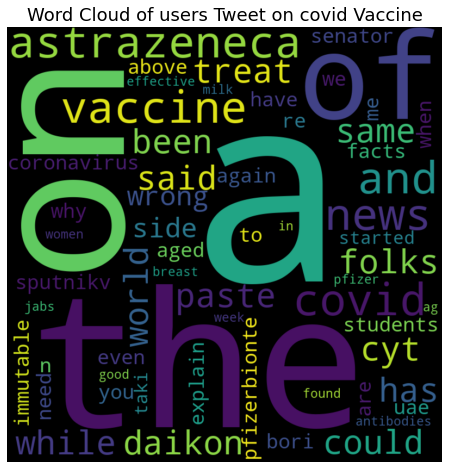

In [27]:
wordcloud(tweets,'clean_text',"Word Cloud of users Tweet on covid Vaccine")

In [28]:
from textblob import TextBlob 

In [29]:
# Sentiment Analysis i.e. Polarity & Subjectivity:-

# Polarity -> ranges from -1 to +1 where, -1 = Negative, 0 = Neutral & +1 = Positive.

# Subjectivity -> ranges from 0 to 1 where, 0 -> Objective & 1 -> Subjective.

# Objective can be considered as factual information whereas subjective can be considered as Personal opinions.

textblob = [TextBlob(text) for text in tweets.clean_text]

tweets['Polarity'] = [p.sentiment.polarity for p in textblob]
tweets['Subjectivity'] = [s.sentiment.subjectivity for s in textblob]

In [30]:
def SentimentAnalysis(data,Feature,title):
    return px.scatter(data,x=Feature,marginal_x='box',marginal_y='box',title=title)

In [31]:
SentimentAnalysis(tweets,'Polarity',"Measure of Polarity of Tweets w.r.t the Vaccine")

In [32]:
SentimentAnalysis(tweets,'Subjectivity',"Measure of Subjectivity w.r.t the Vaccine")

# Data Analysis and Visualisation on

a) Top World Wide Tweet Sources used.

In [33]:
source = pd.DataFrame(tweets.groupby("source")["user_name"].count())
source.reset_index(inplace=True)
source.columns=["source","count"]

fig = px.bar(source[source["count"]>5],x="source",y="count",color="source",text="count",title="Source")
fig.update_traces(textposition='outside')
fig.show()

b) Top 20 Hashtags used by Citizens

In [34]:
tweet_hashtags = tweets[tweets.hashtags != "Not Available"]
tweet_hashtags = tweet_hashtags.hashtags.value_counts().head(20)
px.bar(tweet_hashtags, x='hashtags', title= "Top 20 Hashtags used by Citizens")

c) Top 10 Retweets of Verified and Non-Verified Twitter User Accounts

In [35]:
def UserAccAnalysis(Yaxis,category,title, Top):
    Data = tweets[tweets.user_verified == category].sort_values(by= 'retweets', ascending=False).head(Top)
    fig = px.bar(Data,x='user_name',y=Yaxis,title=title)
    return fig.update_layout(xaxis={'categoryorder':'total descending'})

In [36]:
UserAccAnalysis('retweets',True,"Top Retweets of Verified Twitter User Accounts", 10)

In [37]:
UserAccAnalysis('retweets',False,"Top retweets of Non-Verified Twitter User Accounts", 10)

d) Top 10 followers of Verified and Non-Verified Twitter User Accounts

In [38]:
UserAccAnalysis('user_followers',True,"Top followers of Verified Twitter User Accounts", 10)

In [39]:
UserAccAnalysis('user_followers',False,"Top followers of Non-Verified Twitter User Accounts", 10)

e) Top 10 Liked tweets of Verified and Non-Verified Twitter User Accounts

In [40]:
UserAccAnalysis('favorites',True,"Top favourite(Liked) tweets of Verified Twitter User Accounts", 10)

In [41]:
UserAccAnalysis('favorites',False,"Top favorite(Liked) tweets of Non-Verified Twitter User Accounts", 10)

f) Comparision between the Count of Verified and Non-Verified Twitter account

In [42]:
tweets.user_verified.value_counts()

False    7822
True      809
Name: user_verified, dtype: int64

In [43]:
px.histogram(tweets, x="user_verified", title="Verified Vs Non-Verified Twitter Accounts")